In [1]:
!pip install pycaret[full]

In [2]:
from pycaret.datasets import get_data
data = get_data('germany')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536527,22809,SET OF 6 T-LIGHTS SANTA,6,12/1/2010 13:04,2.95,12662,Germany
1,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,12/1/2010 13:04,2.55,12662,Germany
2,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,12/1/2010 13:04,0.85,12662,Germany
3,536527,22242,5 HOOK HANGER MAGIC TOADSTOOL,12,12/1/2010 13:04,1.65,12662,Germany
4,536527,22244,3 HOOK HANGER MAGIC GARDEN,12,12/1/2010 13:04,1.95,12662,Germany


In [3]:
data.shape

(9495, 8)

In [8]:
!pip install mlxtend
from mlxtend.frequent_patterns import apriori, association_rules

In [9]:
basket = (data.groupby(['InvoiceNo', 'Description'])['Description']
          .count().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

In [10]:
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

In [11]:
frequent_itemsets = apriori(basket, min_support=0.1, use_colnames=True)

In [12]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

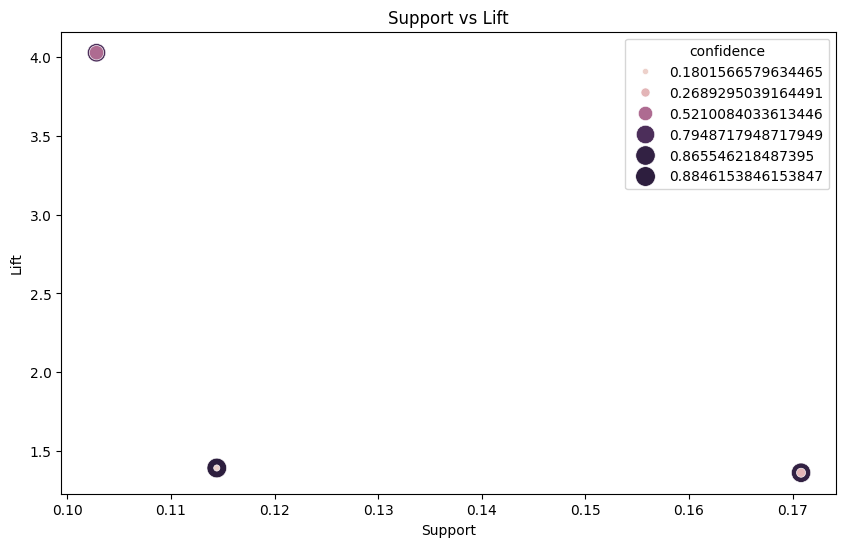

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rules, x='support', y='lift', hue='confidence', size='confidence', sizes=(20, 200))
plt.title('Support vs Lift')
plt.xlabel('Support')
plt.ylabel('Lift')
plt.show()